# Comparaison de 2 collèges.

Objectif : voir les différences de public et de résultats de 2 collèges. 

In [1]:
# import bibliothéques d'analyse de python
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
from matplotlib.ticker import FuncFormatter
import seaborn as sns
import numpy as np

import fonctions.perso_stats as perso_stats

In [2]:
# import du fichier college
college = pd.read_csv('donnee_temp/college.csv',low_memory=False)

In [3]:
# style graphe :
sns.set_theme(style="whitegrid")
#plt.style.use("dark_background")
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})
sns.set_palette("pastel")
palette = sns.color_palette("pastel").as_hex()

In [4]:
#selection des colleges par leurs uai
uai_1 = '0620097U'
uai_2 = '0622108E'

In [5]:
# concatener les données
donnée1 = college[college['UAI']==uai_1].copy()
donnée2 = college[college['UAI']==uai_2].copy()
comparatif = pd.concat([donnée1,donnée2])
del donnée1,donnée2
#sauvegarder les données
comparatif.to_csv('donnee_temp/comparaison.csv')

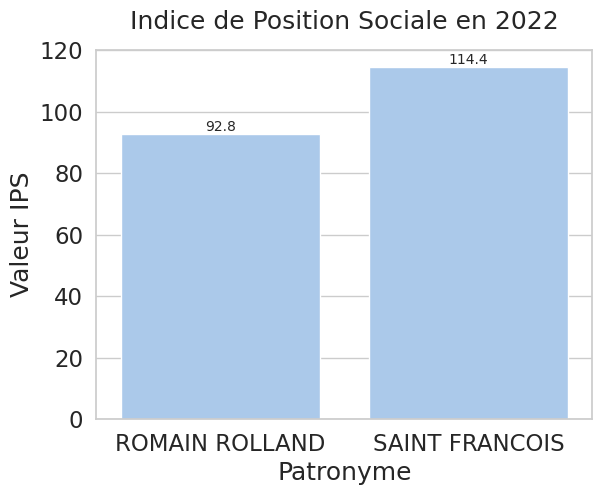

In [6]:
#affichage de graphe :

# ips
fig,ax = plt.subplots()
sns.barplot(data=comparatif,x='Patronyme', y="IPS",ax=ax,estimator="mean",errorbar=None)
ax.set_title("Indice de Position Sociale en 2022",pad=15)
ax.set_ylabel("Valeur IPS")
ax.bar_label(ax.containers[0], fontsize=10)
ax.set_ylim(0)
#plt.savefig('ips_barplot.jpg',format='jpg')
plt.show()

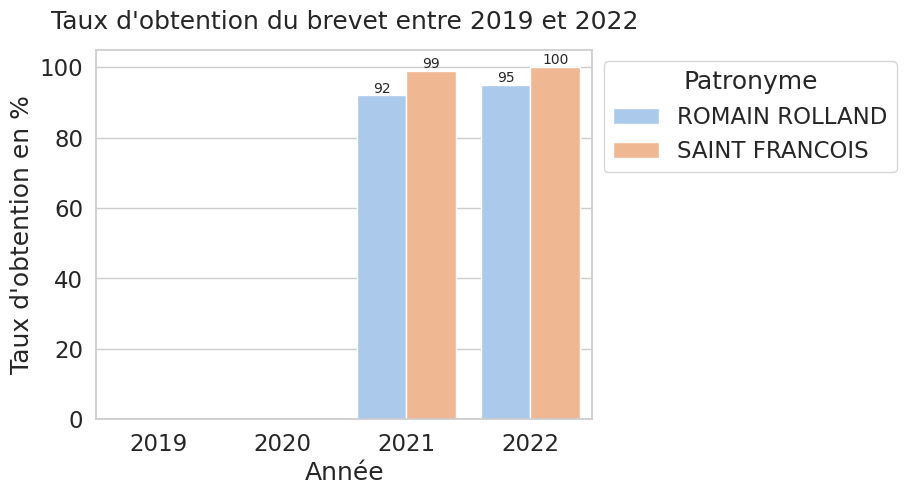

In [7]:
# resultats et notes

fig,ax = plt.subplots()
sns.barplot(data=comparatif, x="Rentrée scolaire", y='Taux de réussite - G',ax=ax,hue="Patronyme",estimator="mean",errorbar=None)
ax.set_title("Taux d'obtention du brevet entre 2019 et 2022",pad=15)
ax.set_ylabel("Taux d'obtention en %")
ax.set_xlabel("Année")
ax.bar_label(ax.containers[0], fontsize=10)
ax.bar_label(ax.containers[1], fontsize=10)
ax.set_ylim(0)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
# plt.savefig('taux_obtention_barplot.jpg',format='jpg')
plt.show()

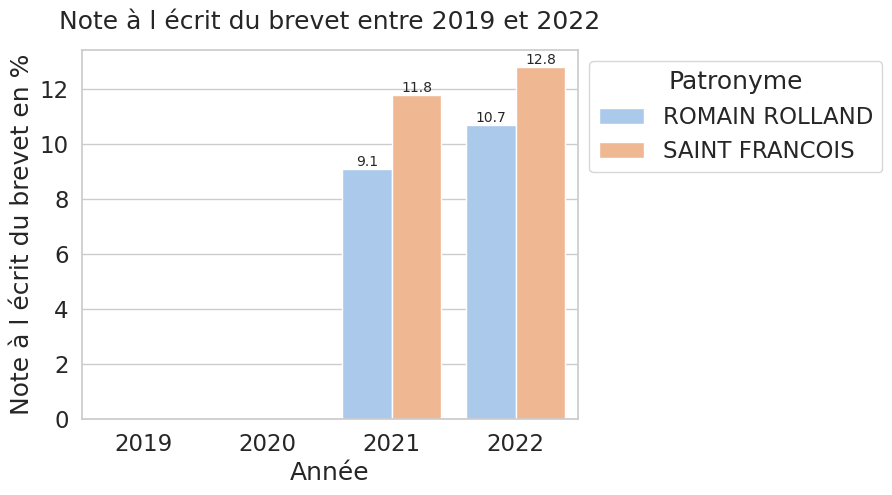

In [8]:
fig,ax = plt.subplots()
sns.barplot(data=comparatif, x="Rentrée scolaire", y="Note à l'écrit - G",ax=ax,hue="Patronyme",estimator="mean",errorbar=None)
ax.set_title("Note à l écrit du brevet entre 2019 et 2022",pad=15)
ax.set_ylabel("Note à l écrit du brevet en %")
ax.set_xlabel("Année")
ax.bar_label(ax.containers[0], fontsize=10)
ax.bar_label(ax.containers[1], fontsize=10)
ax.set_ylim(0)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
# plt.savefig('note_ecrit_barplot.jpg',format='jpg')
plt.show()

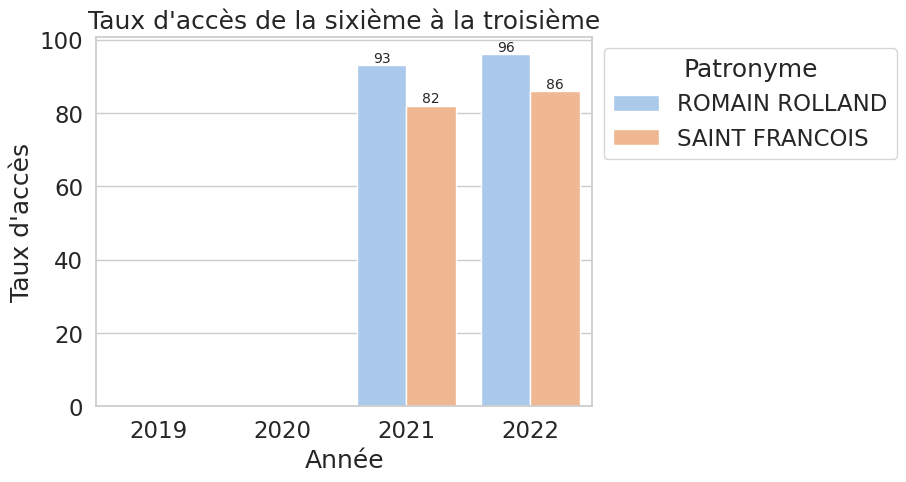

In [9]:
# taux d'accès

fig,ax = plt.subplots()
sns.barplot(data=comparatif, x="Rentrée scolaire", y="Taux d'accès 6ème-3ème",ax=ax,hue="Patronyme",estimator="mean",errorbar=None)
ax.set_title("Taux d'accès de la sixième à la troisième")
ax.set_xlabel("Année")
ax.set_ylabel("Taux d'accès")
ax.bar_label(ax.containers[0], fontsize=10)
ax.bar_label(ax.containers[1], fontsize=10)
ax.set_ylim(0)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
# plt.savefig("taux_d'accès_barplot.jpg",format='jpg')
plt.show()


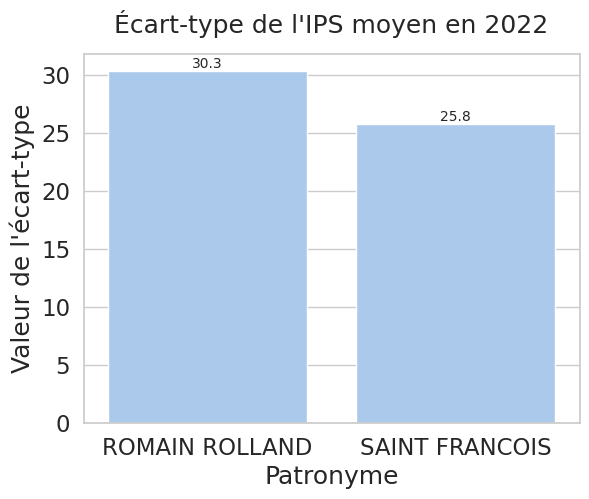

In [10]:
# ecart-type

fig,ax = plt.subplots()
sns.barplot(data=comparatif,x='Patronyme', y="Ecart-type de l'IPS",ax=ax,estimator="mean",errorbar=None)
ax.set_title("Écart-type de l'IPS moyen en 2022",pad=15)
ax.set_ylabel("Valeur de l'écart-type")
ax.bar_label(ax.containers[0], fontsize=10)
ax.set_ylim(0)
# plt.savefig('ecart_type_ips_barplot.jpg',format='jpg')
plt.show()

In [11]:
comparatif['taux_mention'] = comparatif['Nb mentions global - G']/comparatif['Nb candidats - G']*100

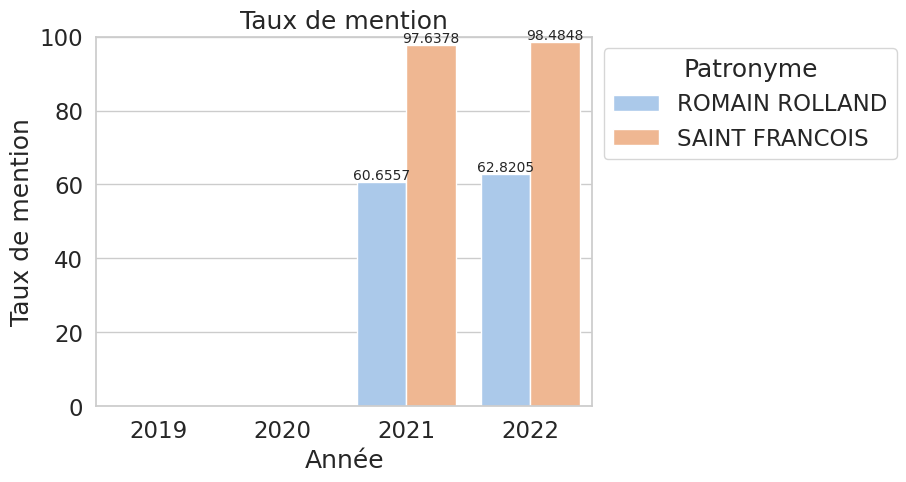

In [12]:
# mention

fig,ax = plt.subplots()
sns.barplot(data=comparatif, x="Rentrée scolaire", y='taux_mention',ax=ax,hue="Patronyme",estimator="mean",errorbar=None)
ax.set_title("Taux de mention")
ax.set_xlabel("Année")
ax.set_ylabel("Taux de mention")
ax.bar_label(ax.containers[0], fontsize=10)
ax.bar_label(ax.containers[1], fontsize=10)
ax.set_ylim(0,100)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1)) 
# plt.savefig("taux_mention_barplot.jpg",format='jpg')
plt.show()

In [13]:
#taux de mention au dessus de 14
comparatif['taux_mention_14'] = (comparatif['Nb mentions B - G']+comparatif['Nb mentions TB - G'])/comparatif['Nb candidats - G']*100

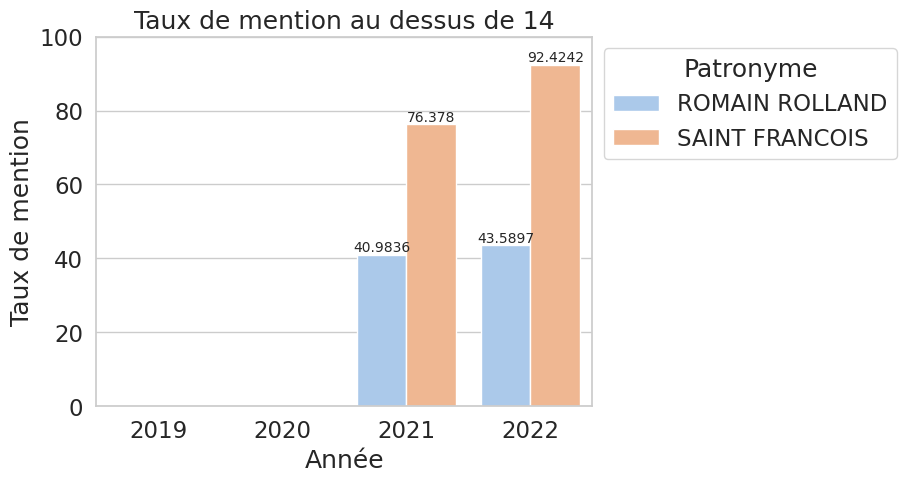

In [14]:
# mention

fig,ax = plt.subplots()
sns.barplot(data=comparatif, x="Rentrée scolaire", y='taux_mention_14',ax=ax,hue="Patronyme",estimator="mean",errorbar=None)
ax.set_title("Taux de mention au dessus de 14")
ax.set_xlabel("Année")
ax.set_ylabel("Taux de mention")
ax.bar_label(ax.containers[0], fontsize=10)
ax.bar_label(ax.containers[1], fontsize=10)
ax.set_ylim(0,100)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
# plt.savefig("taux_mention14_barplot.jpg",format='jpg')
plt.show()

In [15]:
#taux de mention au dessus de 16
comparatif['taux_mention_16'] = comparatif['Nb mentions TB - G']/comparatif['Nb candidats - G']*100

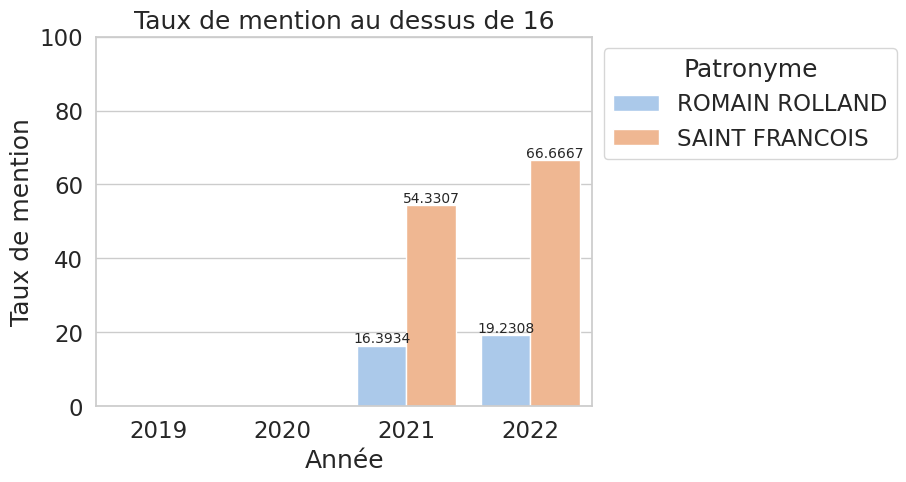

In [16]:
fig,ax = plt.subplots()
sns.barplot(data=comparatif, x="Rentrée scolaire", y='taux_mention_16',ax=ax,hue="Patronyme",estimator="mean",errorbar=None)
ax.set_title("Taux de mention au dessus de 16")
ax.set_xlabel("Année")
ax.set_ylabel("Taux de mention")
ax.bar_label(ax.containers[0], fontsize=10)
ax.bar_label(ax.containers[1], fontsize=10)
ax.set_ylim(0,100)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
# plt.savefig("taux_mention16_barplot.jpg",format='jpg')
plt.show()

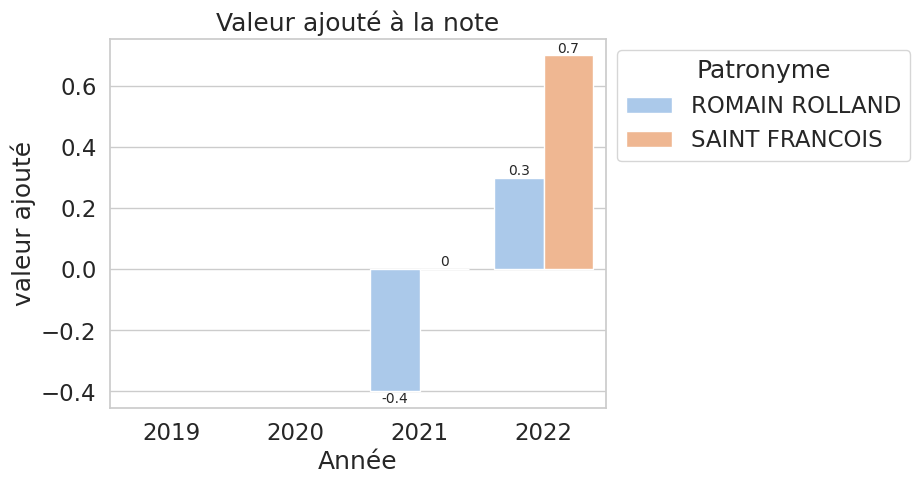

In [17]:
# va_note

fig,ax = plt.subplots()
sns.barplot(data=comparatif, x="Rentrée scolaire", y='VA de la note - G',ax=ax,hue="Patronyme",estimator="mean",errorbar=None)
ax.set_title("Valeur ajouté à la note")
ax.set_xlabel("Année")
ax.set_ylabel("valeur ajouté")
ax.bar_label(ax.containers[0], fontsize=10)
ax.bar_label(ax.containers[1], fontsize=10)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
# plt.savefig("va_note_barplot.jpg",format='jpg')
plt.show()

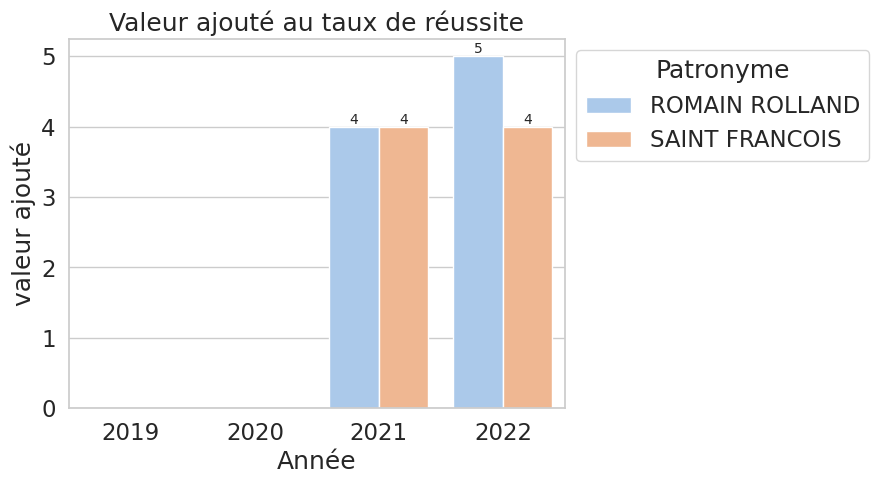

In [18]:
# va_taux d'obtention

fig,ax = plt.subplots()
sns.barplot(data=comparatif, x="Rentrée scolaire", y='VA du taux de réussite - G',ax=ax,hue="Patronyme",estimator="mean",errorbar=None)
ax.set_title("Valeur ajouté au taux de réussite")
ax.set_xlabel("Année")
ax.set_ylabel("valeur ajouté")
ax.bar_label(ax.containers[0], fontsize=10)
ax.bar_label(ax.containers[1], fontsize=10)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
# plt.savefig("va_taux_barplot.jpg",format='jpg')
plt.show()